In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Pretty display for notebooks
%matplotlib inline

# Data Preparation

In [182]:
# Load the Johns Hopkins dataset
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
country_df = country_df.rename(columns={'Last_Update':'date','Country_Region':'country','Lat':'lat','Long_':'long',
                                        'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','ISO3':'iso3'})
country_df = country_df[['date','country','iso3','lat','long','confirmed','deaths','recovered']]
#print(country_df.info())

In [183]:
country_df

,date,country,iso3,lat,long,confirmed,deaths,recovered
0,2020-05-01 18:32:29,Australia,AUS,-25.000000,133.000000,6765,93,5747
1,2020-05-01 18:32:29,Austria,AUT,47.516200,14.550100,15531,589,13110
2,2020-05-01 18:32:29,Canada,CAN,60.001000,-95.001000,54623,3332,22096
3,2020-05-01 18:32:29,China,CHN,30.592800,114.305500,83958,4637,78567
4,2020-05-01 18:32:29,Denmark,DNK,56.000000,10.000000,9509,460,6924
...,...,...,...,...,...,...,...,...
182,2020-05-01 18:32:29,West Bank and Gaza,PSE,31.952200,35.233200,353,2,76
183,2020-05-01 18:32:29,Western Sahara,ESH,24.215500,-12.885800,6,0,5
184,2020-05-01 18:32:29,Yemen,YEM,15.552727,48.516388,6,2,1
185,2020-05-01 18:32:29,Zambia,ZMB,-13.133897,27.849332,109,3,74


In [1]:
# Load the Risk Factors dataset 
risk_df = pd.read_excel(r'C:\Users\totot\OneDrive\Kurvv\Covid19\01_Global\covid19_global_v3.xlsx')
#print(risk_df.info())

NameError: name 'pd' is not defined

In [131]:
df = pd.merge(country_df, risk_df, how='inner', on='iso3') 
df = df.rename(columns={'country_x':'country'})
df = df.drop('country_y', axis=1)
#df.head()
#print(df.info())
#df.isnull().sum()

In [132]:
# make new_variable
df['confirmed_rate'] = df['confirmed']/df['population']
df['deaths_rate'] = df['deaths']/df['confirmed']
df['confirmed_group'] = pd.qcut(df['confirmed'], q=4, labels=False, precision=0)

# USA exclude
#df = df.loc[df['iso3']!='USA']

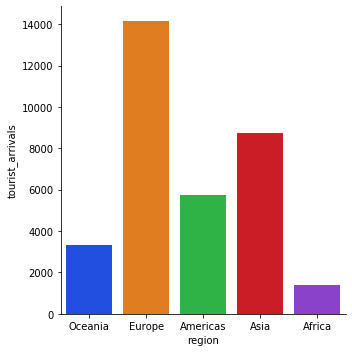

In [133]:
sns.catplot(data=df, x="region", y="tourist_arrivals", kind="bar", palette="bright", ci=None)

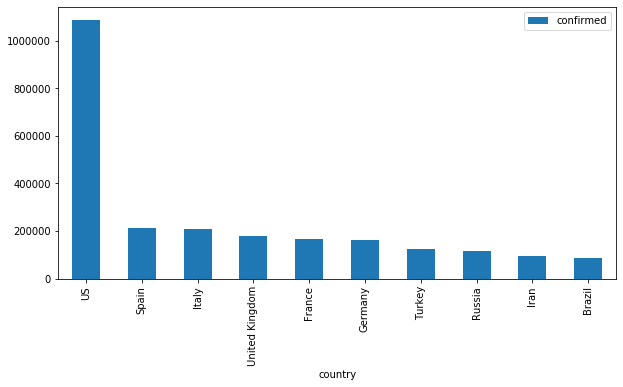

In [174]:
temp=df.sort_values(['confirmed'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= 'confirmed', kind = 'bar',  ax = ax)   

In [134]:
###########################################################################
# As ML package cannot handle string variable, 
# so we need to change to numeric variable by Label Encoding 
###########################################################################

from sklearn.preprocessing import LabelEncoder

cat_data = df['region']
le = LabelEncoder()
le.fit_transform(cat_data)
df['region'] = le.transform(cat_data)

cat_data = df['sub_region']
le = LabelEncoder()
le.fit_transform(cat_data)
df['sub_region'] = le.transform(cat_data)

df['region'] = df['region'].astype("category")
df['sub_region'] = df['sub_region'].astype("category")

df.head()

,country,iso3,lat,long,confirmed,deaths,recovered,region,sub_region,population,...,nurses_midwives,pharmacists,physicians,hospital_beds,temperature,co2_emissions,pm25,confirmed_rate,deaths_rate,confirmed_group
0,Australia,AUS,-25.0000,133.0000,6765,93,5747,4,0,24982688,...,12.7,0.9,3.6,3.84,27.56760,15.388766,6.056567,0.000271,0.013747,3
1,Austria,AUT,47.5162,14.5501,15531,589,13110,3,14,8840521,...,8.2,0.7,5.1,7.37,-0.41430,6.869868,15.487848,0.001757,0.037924,3
2,Canada,CAN,60.0010,-95.0010,54623,3332,22096,1,7,37057765,...,9.9,1.0,2.6,2.50,-20.98400,15.158927,7.415250,0.001474,0.061000,3
3,China,CHN,30.5928,114.3055,83958,4637,78567,2,2,1392730000,...,NaN,NaN,NaN,4.34,-3.92290,7.543908,56.886599,0.000060,0.055230,3
4,Denmark,DNK,56.0000,10.0000,9509,460,6924,3,8,5793636,...,10.3,0.0,4.5,2.50,4.20316,5.935712,10.456906,0.001641,0.048375,3


In [70]:
gr0 = df.loc[df['confirmed_group'] == 0]
gr1 = df.loc[df['confirmed_group'] == 1]
gr2 = df.loc[df['confirmed_group'] == 2]
gr3 = df.loc[df['confirmed_group'] == 3]

C:\Users\totot\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\totot\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\totot\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\totot\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


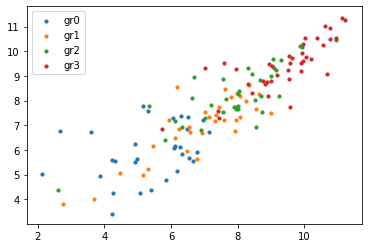

In [71]:
# plots
plt.scatter(np.log(gr0[['tour_expenditure']]), np.log(gr0[['tourist_arrivals']]), s=10, label='gr0')
plt.scatter(np.log(gr1[['tour_expenditure']]), np.log(gr1[['tourist_arrivals']]), s=10, label='gr1')
plt.scatter(np.log(gr2[['tour_expenditure']]), np.log(gr2[['tourist_arrivals']]), s=10, label='gr2')
plt.scatter(np.log(gr3[['tour_expenditure']]), np.log(gr3[['tourist_arrivals']]), s=10, label='gr3')

plt.legend()
plt.show()

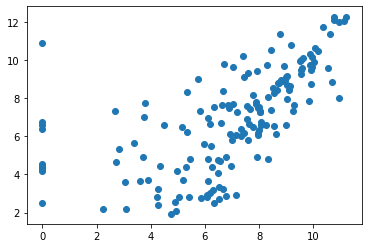

In [72]:
plt.scatter(np.log1p(df[['tour_expenditure']]), np.log1p(df[['confirmed']]))

In [73]:
temp=df[['confirmed','population', 'pop_male', 'pop_female',
       'pop_14under', 'pop_60over', 'density', 'gdp',
       'tour_expenditure', 'tourist_arrivals', 'air_passengers', 'lung',
       'pneumonia', 'asthma', 'hiv', 'unsafe_water', 'poor_sanitation',
       'no_handwashing', 'alcohol_use', 'drug_use', 'high_blood_sugar',
       'high_cholesterol', 'obesity', 'high_blood_pressure', 'smoking',
         'temperature', 'co2_emissions', 'pm25']]
temp = temp.dropna()

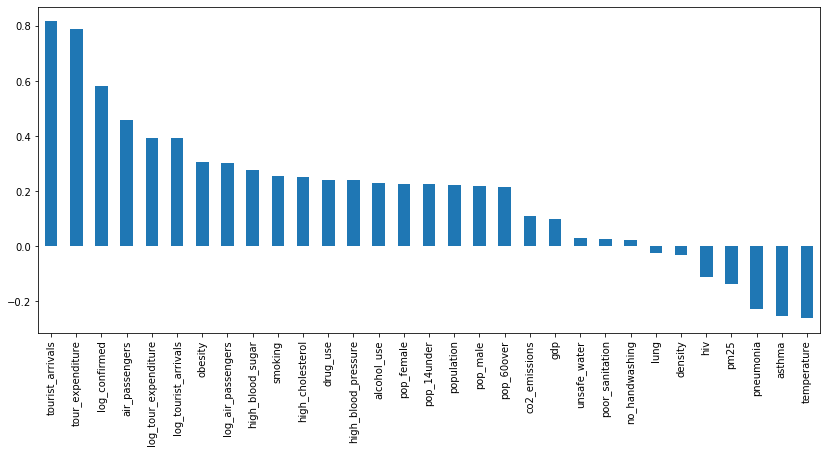

In [86]:
#Correlation between confirmed and the other numeric features

corr_with_confirmed = temp.corr()["confirmed"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_confirmed.drop("confirmed").plot.bar()
plt.show()


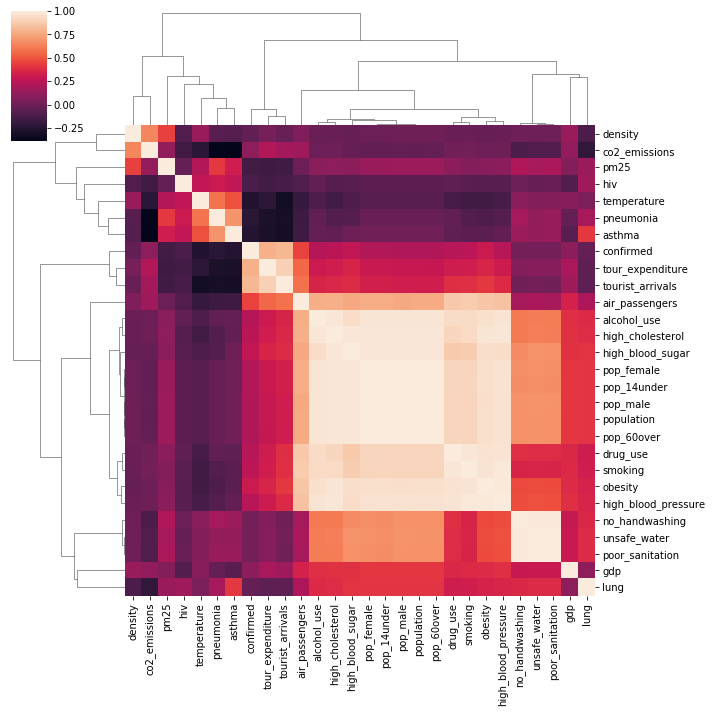

In [75]:
# cluster map

cluster = sns.clustermap(temp.corr())
plt.setp(cluster.ax_heatmap.get_xticklabels(), rotation=90) 
plt.show()

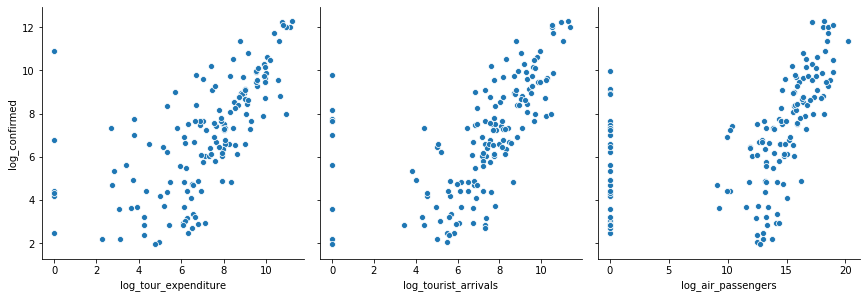

In [77]:
temp['log_tour_expenditure'] = np.log1p(temp['tour_expenditure'])
temp['log_tourist_arrivals'] = np.log1p(temp['tourist_arrivals'])
temp['log_air_passengers'] = np.log1p(temp['air_passengers'])
temp['log_confirmed'] = np.log1p(temp['confirmed'])

g = sns.PairGrid(temp, y_vars=["log_confirmed"], x_vars=["log_tour_expenditure", "log_tourist_arrivals","log_air_passengers"], height=4)
g.map(sns.scatterplot)

# Explore Features

### Target feature distribution

In [81]:
# assign target features
y = temp.iloc[:,0]
y_trans = np.log1p(y)

The skewness of target variable is 4.132000215273175


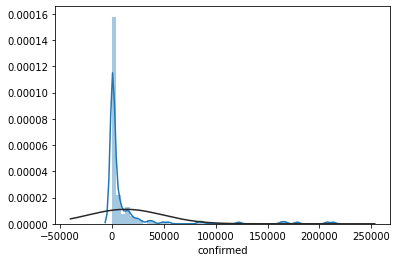

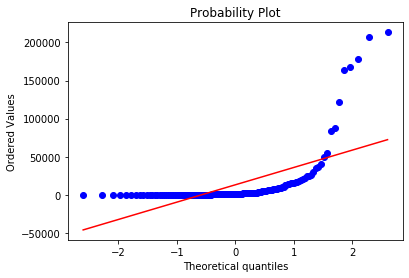

In [82]:
#histogram and normal probability plot
#skewness
from scipy.stats import norm

sns.distplot(y, fit=norm);
print("The skewness of target variable is {}".format(y.skew()))

fig = plt.figure()
res = stats.probplot(y, plot=plt)

The skewness of target variable is -0.06895210500602818


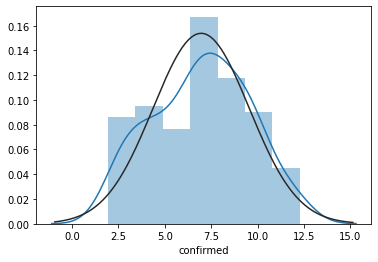

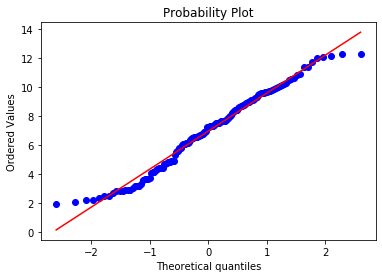

In [83]:
#histogram and normal probability plot
#skewness

from scipy.stats import norm
sns.distplot(y_trans, fit=norm);
print("The skewness of target variable is {}".format(y_trans.skew()))

fig = plt.figure()
res = stats.probplot(y_trans, plot=plt)

# Split Train & Test Data

In [84]:
df.columns

Index(['country', 'lat', 'long', 'confirmed', 'deaths', 'recovered', 'iso3',
       'region', 'sub_region', 'population', 'pop_male', 'pop_female',
       'pop_14under', 'pop_60over', 'density', 'gdp', 'tour_expenditure',
       'tourist_arrivals', 'air_passengers', 'lung', 'pneumonia', 'asthma',
       'hiv', 'unsafe_water', 'poor_sanitation', 'no_handwashing',
       'alcohol_use', 'drug_use', 'high_blood_sugar', 'high_cholesterol',
       'obesity', 'high_blood_pressure', 'smoking', 'special_hospitals',
       'hospitals', 'nurses_midwives', 'pharmacists', 'physicians',
       'hospital_beds', 'temperature', 'co2_emissions', 'pm25',
       'confirmed_rate', 'deaths_rate', 'confirmed_group'],
      dtype='object')

In [186]:
df_new = df[['confirmed', 'region', 'population', 'pop_male', 'pop_female',
       'pop_14under', 'pop_60over', 'density', 'gdp', 'tour_expenditure',
       'tourist_arrivals', 'air_passengers', 'lung', 'pneumonia', 'asthma',
       'hiv', 'unsafe_water', 'poor_sanitation', 'no_handwashing',
       'alcohol_use', 'drug_use', 'high_blood_sugar', 'high_cholesterol',
       'obesity', 'high_blood_pressure', 'smoking', 'temperature', 'co2_emissions', 'pm25']]
             

# fill missing data with 0
df_new = df_new.fillna(0)

#print(df_new.info())


In [187]:
# Fianl target variables
y = df_new.iloc[:,0]
y = np.log1p(y)

# X dataframe
X = df_new.iloc[:, 1: ]
X.columns

Index(['region', 'population', 'pop_male', 'pop_female', 'pop_14under',
       'pop_60over', 'density', 'gdp', 'tour_expenditure', 'tourist_arrivals',
       'air_passengers', 'lung', 'pneumonia', 'asthma', 'hiv', 'unsafe_water',
       'poor_sanitation', 'no_handwashing', 'alcohol_use', 'drug_use',
       'high_blood_sugar', 'high_cholesterol', 'obesity',
       'high_blood_pressure', 'smoking', 'temperature', 'co2_emissions',
       'pm25'],
      dtype='object')

In [188]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [189]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Random Forest Regression Train Model

In [190]:
#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf = RandomForestRegressor()

#Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Make Prediction & Evaluation

In [191]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
score = rf.score(X_train,y_train)

print ("R2 of Random Forest Regression:", score)
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

R2 of Random Forest Regression: 0.9588846597997682
MAE:  1.0440588113216593
MSE:  1.7430527483835785
RMSE: 1.3202472300230659
RMSLE: 0.22057310064367114


Text(0.5, 0, 'Relative Importance')

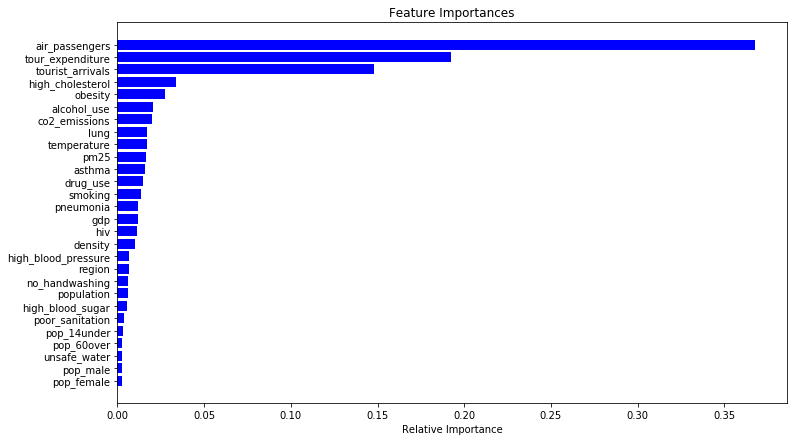

In [201]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [193]:
# Define feature_list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: air_passengers       Importance: 0.37
Variable: tour_expenditure     Importance: 0.19
Variable: tourist_arrivals     Importance: 0.15
Variable: high_cholesterol     Importance: 0.03
Variable: obesity              Importance: 0.03
Variable: lung                 Importance: 0.02
Variable: asthma               Importance: 0.02
Variable: alcohol_use          Importance: 0.02
Variable: drug_use             Importance: 0.02
Variable: temperature          Importance: 0.02
Variable: co2_emissions        Importance: 0.02
Variable: pm25                 Importance: 0.02
Variable: region               Importance: 0.01
Variable: population           Importance: 0.01
Variable: density              Importance: 0.01
Variable: gdp                  Importance: 0.01
Variable: pneumonia            Importance: 0.01
Variable: hiv                  Importance: 0.01
Variable: no_handwashing       Importance: 0.01
Variable: high_blood_sugar     Importance: 0.01
Variable: high_blood_pressure  Importanc

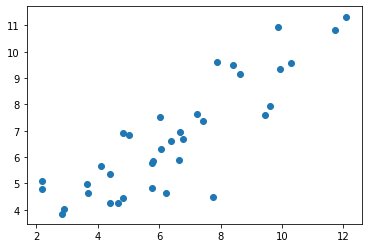

In [194]:
#plt.scatter(np.log1p(y_test),np.log1p(y_pred))
plt.scatter(y_test,y_pred)

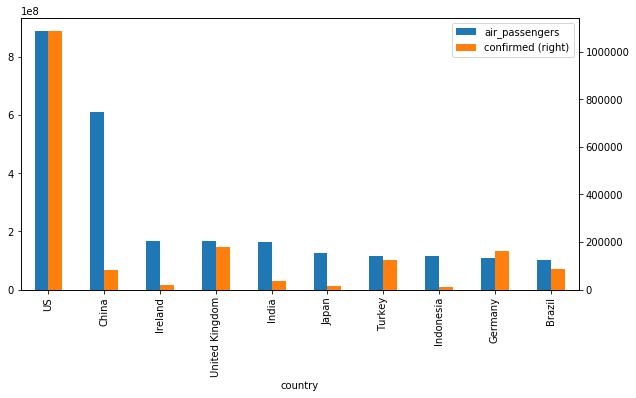

In [203]:
temp=df.sort_values(['air_passengers'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= ['air_passengers','confirmed'], secondary_y='confirmed', kind = 'bar',  ax = ax)         

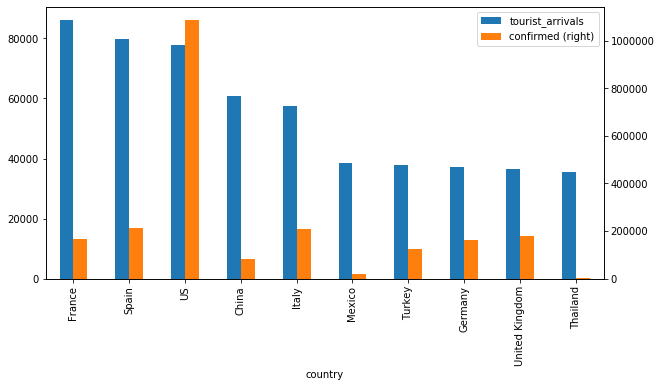

In [196]:
temp=df.sort_values(['tourist_arrivals'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (10,5))
temp.plot(x ='country', y= ['tourist_arrivals','confirmed'], secondary_y='confirmed', kind = 'bar',  ax = ax)   

# Interpret Model and Visualization

In [197]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')

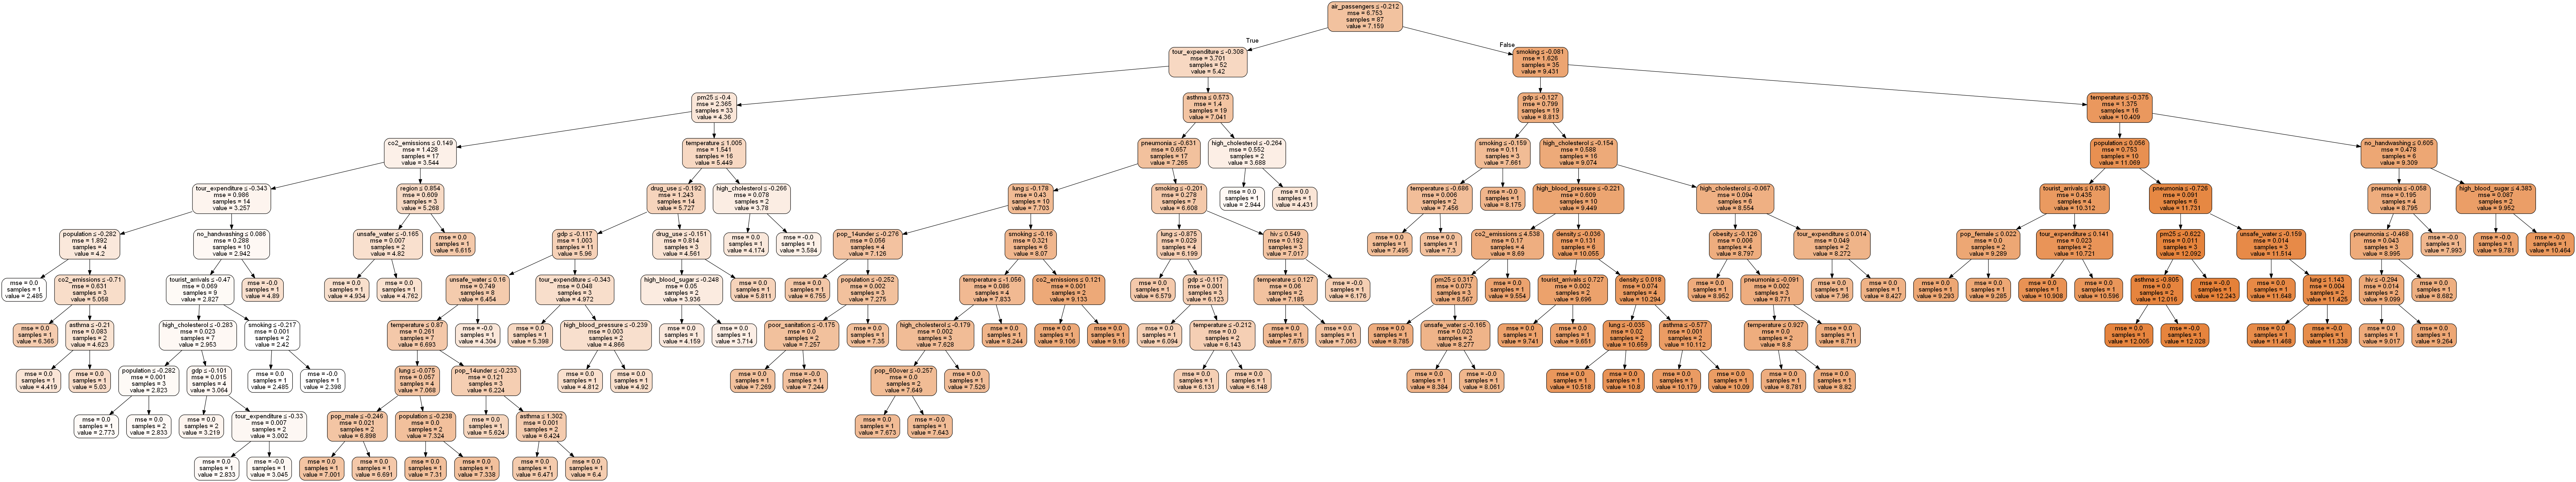

In [198]:
#!pip3 install pydotplus --no-cache-dir --no-binary :all:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [199]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')

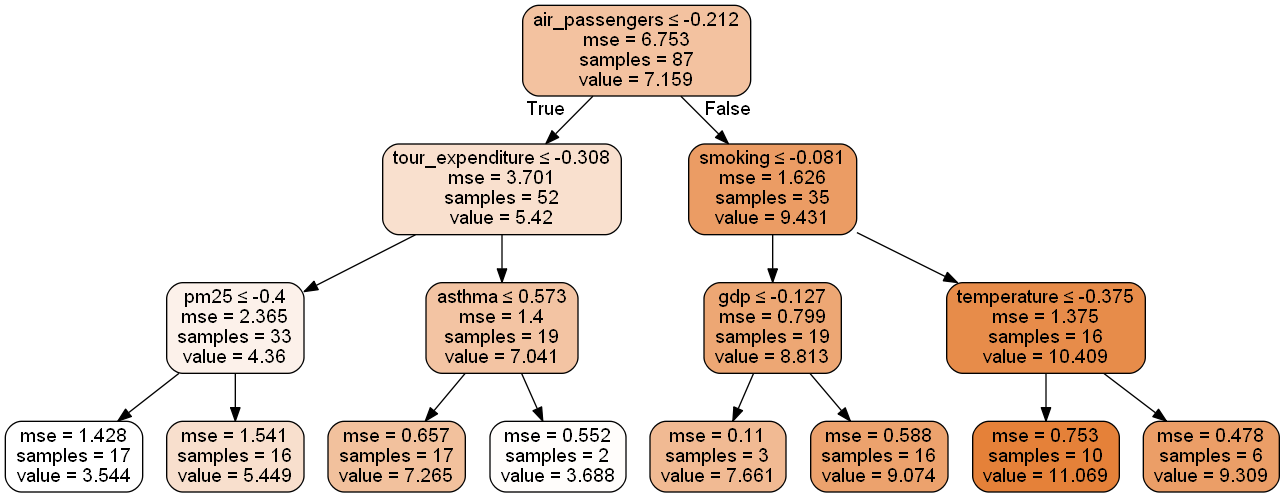

In [200]:
#!pip3 install pydotplus --no-cache-dir --no-binary :all:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [141]:
#feature scaling

'''
#(1) StandardScaler()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


#(2) RobustScaler()
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

#(3) MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


#(4) Normalizer()
from sklearn.preprocessing import Normalizer
nm = Normalizer()
X_train = nm.fit_transform(X_train)
X_test = nm.transform(X_test)
'''

'\n#(1) StandardScaler()\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nX_train = ss.fit_transform(X_train)\nX_test = ss.transform(X_test)\n\n\n#(2) RobustScaler()\nfrom sklearn.preprocessing import RobustScaler\nrs = RobustScaler()\nX_train = rs.fit_transform(X_train)\nX_test = rs.transform(X_test)\n\n#(3) MinMaxScaler()\nfrom sklearn.preprocessing import MinMaxScaler\nmms = MinMaxScaler()\nX_train = mms.fit_transform(X_train)\nX_test = mms.transform(X_test)\n\n\n#(4) Normalizer()\nfrom sklearn.preprocessing import Normalizer\nnm = Normalizer()\nX_train = nm.fit_transform(X_train)\nX_test = nm.transform(X_test)\n'

# Find the best parameter

In [71]:
# setting the static parameters
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

parameters = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rfr, parameters, cv = 3, n_jobs = -1, verbose = 1)
grid.fit(X,y)
grid.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    6.8s finished


{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}